In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Dataset

In [7]:
df = pd.read_csv("ecommerce_delivery_analytics.csv")
df

,Order ID,Customer ID,Platform,Order Date & Time,Delivery Time (Minutes),Product Category,Order Value (INR),Customer Feedback,Service Rating,Delivery Delay,Refund Requested
0,ORD000001,CUST2824,JioMart,19:29.5,30,Fruits & Vegetables,382,"Fast delivery, great service!",5,No,No
1,ORD000002,CUST1409,Blinkit,54:29.5,16,Dairy,279,Quick and reliable!,5,No,No
2,ORD000003,CUST5506,JioMart,21:29.5,25,Beverages,599,Items missing from order.,2,No,Yes
3,ORD000004,CUST5012,JioMart,19:29.5,42,Beverages,946,Items missing from order.,2,Yes,Yes
4,ORD000005,CUST4657,Blinkit,49:29.5,30,Beverages,334,"Fast delivery, great service!",5,No,No
...,...,...,...,...,...,...,...,...,...,...,...
99995,ORD099996,CUST5324,JioMart,49:29.5,24,Dairy,289,Packaging could be better.,3,No,No
99996,ORD099997,CUST1677,JioMart,18:29.5,19,Snacks,322,Good quality products.,4,No,No
99997,ORD099998,CUST8198,JioMart,27:29.5,41,Dairy,135,"Fast delivery, great service!",5,Yes,No
99998,ORD099999,CUST9975,JioMart,14:29.5,31,Grocery,973,Quick and reliable!,5,No,No


In [16]:
df.shape

(100000, 11)

# Basic Checks

In [18]:
df.head()

,Order ID,Customer ID,Platform,Order Date & Time,Delivery Time (Minutes),Product Category,Order Value (INR),Customer Feedback,Service Rating,Delivery Delay,Refund Requested
0,ORD000001,CUST2824,JioMart,19:29.5,30,Fruits & Vegetables,382,"Fast delivery, great service!",5,No,No
1,ORD000002,CUST1409,Blinkit,54:29.5,16,Dairy,279,Quick and reliable!,5,No,No
2,ORD000003,CUST5506,JioMart,21:29.5,25,Beverages,599,Items missing from order.,2,No,Yes
3,ORD000004,CUST5012,JioMart,19:29.5,42,Beverages,946,Items missing from order.,2,Yes,Yes
4,ORD000005,CUST4657,Blinkit,49:29.5,30,Beverages,334,"Fast delivery, great service!",5,No,No


#### Columns of the Dataset

In [3]:
df.columns

Index(['Order ID', 'Customer ID', 'Platform', 'Order Date & Time',
       'Delivery Time (Minutes)', 'Product Category', 'Order Value (INR)',
       'Customer Feedback', 'Service Rating', 'Delivery Delay',
       'Refund Requested'],
      dtype='object')

#### Checking Structure of Dataset

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Order ID                 100000 non-null  object
 1   Customer ID              100000 non-null  object
 2   Platform                 100000 non-null  object
 3   Order Date & Time        100000 non-null  object
 4   Delivery Time (Minutes)  100000 non-null  int64 
 5   Product Category         100000 non-null  object
 6   Order Value (INR)        100000 non-null  int64 
 7   Customer Feedback        100000 non-null  object
 8   Service Rating           100000 non-null  int64 
 9   Delivery Delay           100000 non-null  object
 10  Refund Requested         100000 non-null  object
dtypes: int64(3), object(8)
memory usage: 8.4+ MB


#### Checking Summary Statistics of Numerical Columns

In [22]:
df.describe()

,Delivery Time (Minutes),Order Value (INR),Service Rating
count,100000.000000,100000.000000,100000.000000
mean,29.536140,590.994400,3.240790
std,9.958933,417.409058,1.575962
min,5.000000,50.000000,1.000000
25%,23.000000,283.000000,2.000000
50%,30.000000,481.000000,3.000000
75%,36.000000,770.000000,5.000000
max,76.000000,2000.000000,5.000000


#### Checking Summary Statistics of Categorical Columns

In [7]:
df.describe(include="O")

,Order ID,Customer ID,Platform,Order Date & Time,Product Category,Customer Feedback,Delivery Delay,Refund Requested
count,100000,100000,100000,100000,100000,100000,100000,100000
unique,100000,9000,3,60,6,13,2,2
top,ORD099984,CUST8779,Swiggy Instamart,50:29.5,Dairy,"Easy to order, loved it!",No,No
freq,1,26,33449,1755,16857,7791,86328,54181


# Preprocessing Techniques on Dataset Individual Columns

## Checking Missing Values

In [16]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

## Checking Duplicates

In [8]:
df.duplicated().sum()

np.int64(0)

#### Fix Inconsistencies

In [4]:
df.columns

Index(['Order ID', 'Customer ID', 'Platform', 'Order Date & Time',
       'Delivery Time (Minutes)', 'Product Category', 'Order Value (INR)',
       'Customer Feedback', 'Service Rating', 'Delivery Delay',
       'Refund Requested'],
      dtype='object')

In [13]:
df.rename(columns = {'Order Date & Time':'Order_Date_Time',
                     'Delivery Time (Minutes)':'Delivery_Time_Minutes',
                    'Order Value (INR)':'Order_Value_INR'},inplace=True)

In [5]:
df.columns

Index(['Order ID', 'Customer ID', 'Platform', 'Order_Date_Time',
       'Delivery_Time_Minutes', 'Product Category', 'Order_Value_INR',
       'Customer Feedback', 'Service Rating', 'Delivery Delay',
       'Refund Requested'],
      dtype='object')

In [48]:
df.head()

,Order ID,Customer ID,Platform,Order_Date_Time,Delivery_Time_Minutes,Product Category,Order_Value_INR,Customer Feedback,Service Rating,Delivery Delay,Refund Requested
0,ORD000001,CUST2824,JioMart,19:29.5,30,Fruits & Vegetables,382,"Fast delivery, great service!",5,No,No
1,ORD000002,CUST1409,Blinkit,54:29.5,16,Dairy,279,Quick and reliable!,5,No,No
2,ORD000003,CUST5506,JioMart,21:29.5,25,Beverages,599,Items missing from order.,2,No,Yes
3,ORD000004,CUST5012,JioMart,19:29.5,42,Beverages,946,Items missing from order.,2,Yes,Yes
4,ORD000005,CUST4657,Blinkit,49:29.5,30,Beverages,334,"Fast delivery, great service!",5,No,No


In [51]:
df.Platform.value_counts()

Platform
Swiggy Instamart    33449
Blinkit             33424
JioMart             33127
Name: count, dtype: int64

In [17]:
df['Platform'] = df['Platform'].str.strip().str.title()
df['Platform'] 

0        Jiomart
1        Blinkit
2        Jiomart
3        Jiomart
4        Blinkit
          ...   
99995    Jiomart
99996    Jiomart
99997    Jiomart
99998    Jiomart
99999    Jiomart
Name: Platform, Length: 100000, dtype: object

In [14]:
df['Product Category'] = df['Product Category'].str.strip().str.title()
df['Product Category']

0        Fruits & Vegetables
1                      Dairy
2                  Beverages
3                  Beverages
4                  Beverages
                ...         
99995                  Dairy
99996                 Snacks
99997                  Dairy
99998                Grocery
99999    Fruits & Vegetables
Name: Product Category, Length: 100000, dtype: object

In [15]:
df['Delivery Delay'] = df['Delivery Delay'].str.title()
df['Delivery Delay'] 

0         No
1         No
2         No
3        Yes
4         No
        ... 
99995     No
99996     No
99997    Yes
99998     No
99999     No
Name: Delivery Delay, Length: 100000, dtype: object

In [16]:
df['Refund Requested'] = df['Refund Requested'].str.title()
df['Refund Requested']

0         No
1         No
2        Yes
3        Yes
4         No
        ... 
99995     No
99996     No
99997     No
99998     No
99999     No
Name: Refund Requested, Length: 100000, dtype: object

In [35]:
df.groupby("Platform")["Order ID"].count()

Platform
Blinkit             33424
JioMart             33127
Swiggy Instamart    33449
Name: Order ID, dtype: int64

In [13]:
df.groupby("Product Category")["Order ID"].count()

Product Category
Beverages              16536
Dairy                  16857
Fruits & Vegetables    16632
Grocery                16737
Personal Care          16533
Snacks                 16705
Name: Order ID, dtype: int64

In [54]:
df.groupby("Platform")["Delivery Delay"].value_counts()

Platform          Delivery Delay
Blinkit           No                28951
                  Yes                4473
JioMart           No                28547
                  Yes                4580
Swiggy Instamart  No                28830
                  Yes                4619
Name: count, dtype: int64

In [59]:
df.groupby("Platform")["Refund Requested"].value_counts()

Platform          Refund Requested
Blinkit           No                  18071
                  Yes                 15353
JioMart           No                  17949
                  Yes                 15178
Swiggy Instamart  No                  18161
                  Yes                 15288
Name: count, dtype: int64

In [57]:
df.groupby('Platform')['Delivery_Time_Minutes'].mean().sort_values()

Platform
Blinkit             29.474898
Swiggy Instamart    29.499925
JioMart             29.634498
Name: Delivery_Time_Minutes, dtype: float64

In [4]:
df.groupby("Platform")["Product Category"].value_counts()

Platform          Product Category   
Blinkit           Dairy                  5643
                  Beverages              5593
                  Grocery                5586
                  Fruits & Vegetables    5576
                  Snacks                 5563
                  Personal Care          5463
JioMart           Grocery                5605
                  Dairy                  5586
                  Fruits & Vegetables    5546
                  Snacks                 5543
                  Personal Care          5436
                  Beverages              5411
Swiggy Instamart  Personal Care          5634
                  Dairy                  5628
                  Snacks                 5599
                  Grocery                5546
                  Beverages              5532
                  Fruits & Vegetables    5510
Name: count, dtype: int64

# Data Analysis through Visualizations

## UNIVARIATE ANALYSIS

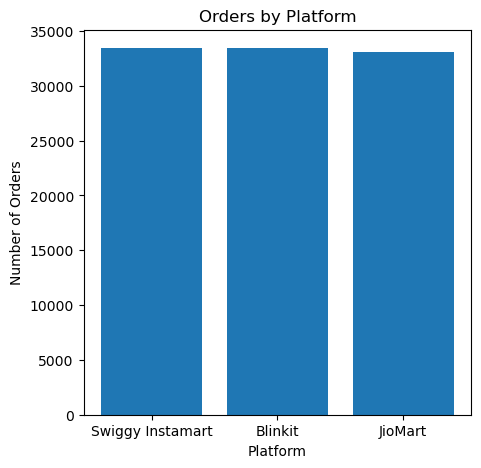

In [69]:
plt.figure(figsize=(5,5))
plt.bar(df["Platform"].value_counts().index,df["Platform"].value_counts().values)
plt.title("Orders by Platform")
plt.xlabel("Platform")
plt.ylabel("Number of Orders")
plt.show()


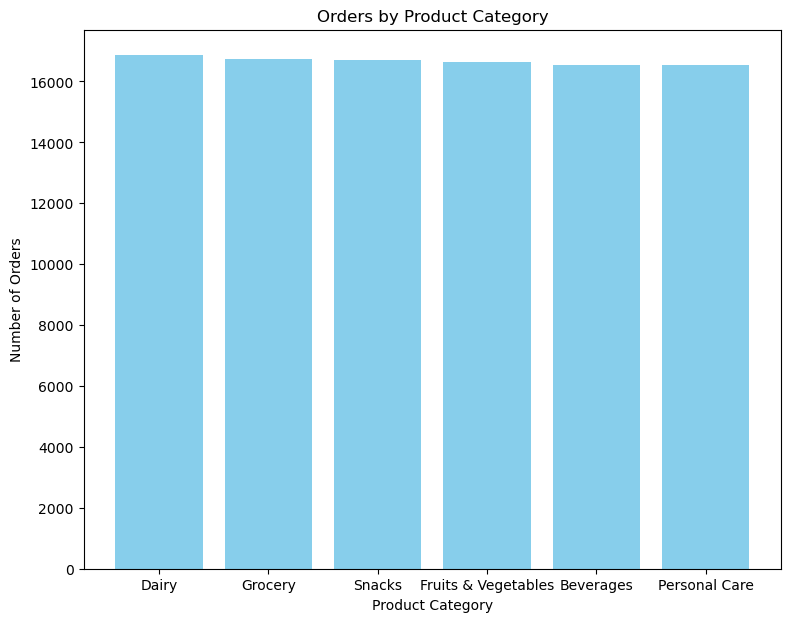

In [7]:
plt.figure(figsize=(9,7))
plt.bar(df["Product Category"].value_counts().index,df["Product Category"].value_counts().values,color="skyblue")
plt.title("Orders by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Number of Orders")
plt.show()


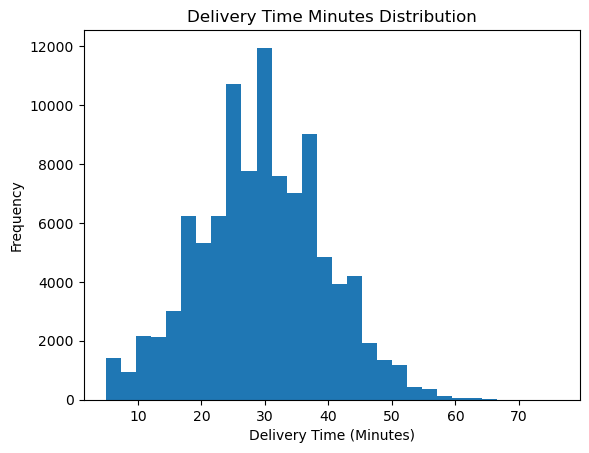

In [86]:
plt.hist(df["Delivery_Time_Minutes"],bins=30)
plt.title("Delivery Time Minutes Distribution")
plt.xlabel("Delivery Time (Minutes)")
plt.ylabel("Frequency")
plt.show()

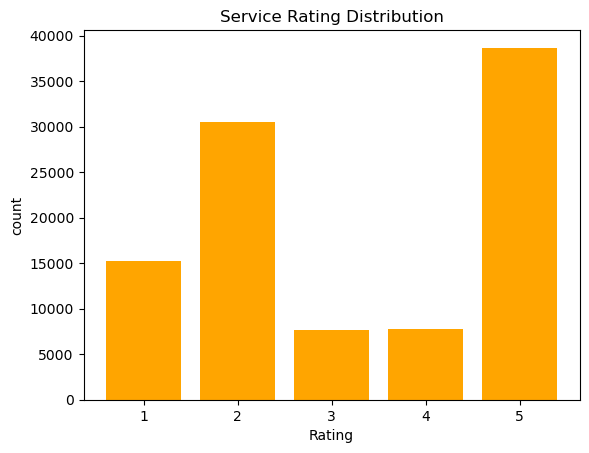

In [19]:
plt.bar(df["Service Rating"].value_counts().index,df["Service Rating"].value_counts().values,color="orange")
plt.title("Service Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("count")
plt.show()

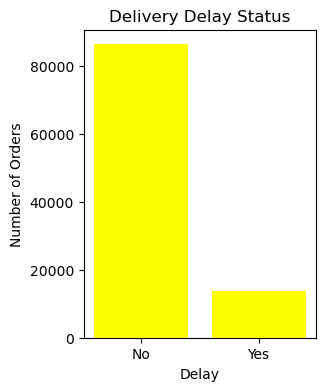

In [29]:
plt.figure(figsize=(3,4))
plt.bar(df["Delivery Delay"].value_counts().index,df["Delivery Delay"].value_counts().values,color="yellow")
plt.title('Delivery Delay Status')
plt.xlabel('Delay')
plt.ylabel('Number of Orders')
plt.show()

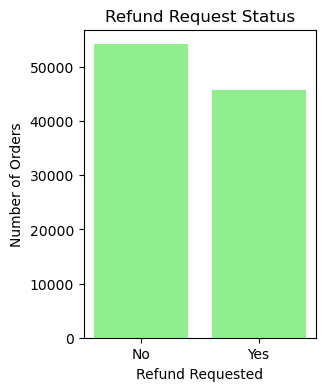

In [32]:
plt.figure(figsize=(3,4))
plt.bar(df["Refund Requested"].value_counts().index,df["Refund Requested"].value_counts().values,color="lightgreen")
plt.title('Refund Request Status')
plt.xlabel('Refund Requested')
plt.ylabel('Number of Orders')
plt.show()


## Bivariate Analysis-Categorical and Categorical

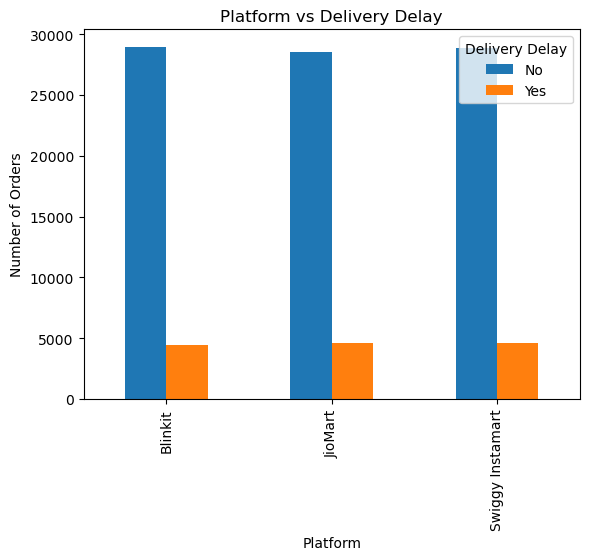

In [25]:
pd.crosstab(df['Platform'], df['Delivery Delay']).plot(kind='bar')
plt.title('Platform vs Delivery Delay')
plt.xlabel('Platform')
plt.ylabel('Number of Orders')
plt.show()


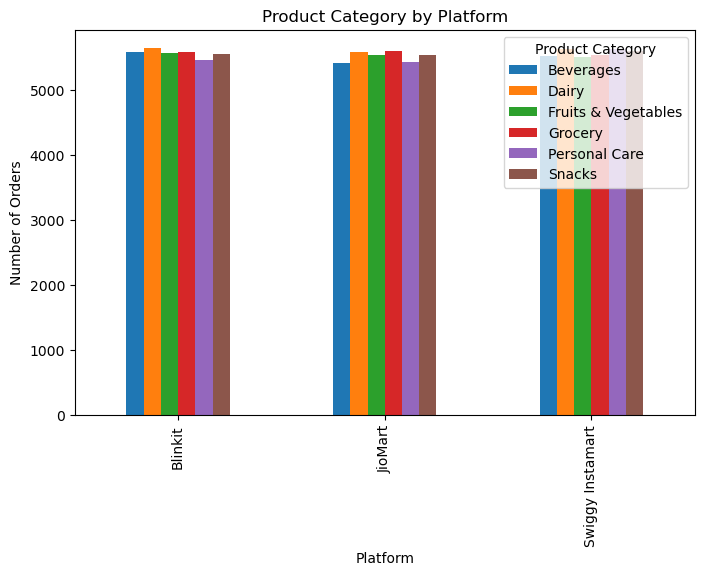

In [10]:
pd.crosstab(df['Platform'], df['Product Category']).plot(kind='bar',figsize=(8,5))
plt.title('Product Category by Platform')
plt.xlabel('Platform')
plt.ylabel('Number of Orders')
plt.show()


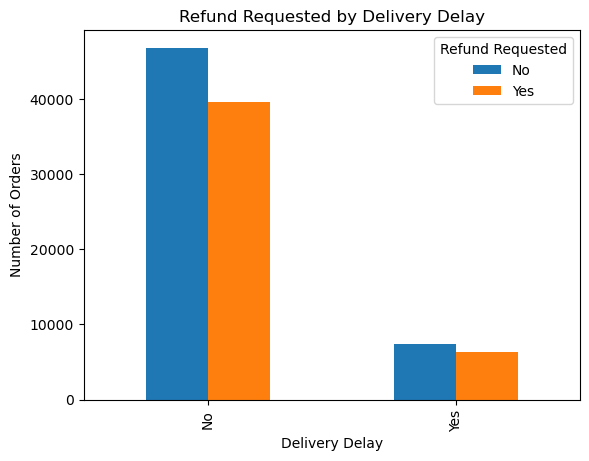

In [14]:
pd.crosstab(df['Delivery Delay'], df['Refund Requested']).plot(kind='bar')
plt.title('Refund Requested by Delivery Delay')
plt.xlabel('Delivery Delay')
plt.ylabel('Number of Orders')
plt.show()


# Bivariate Analysis-Categorical and Numerical

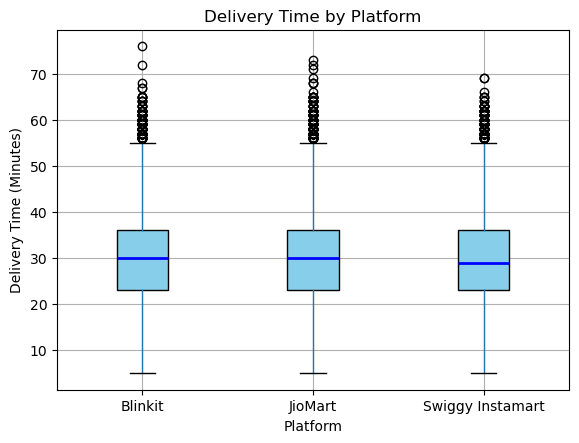

In [8]:
df.boxplot(
    column='Delivery_Time_Minutes',
    by='Platform',
    patch_artist=True,
    boxprops=dict(facecolor='skyblue'),
     medianprops=dict(color ="blue",linewidth=2),
)

plt.title('Delivery Time by Platform')
plt.suptitle('')
plt.xlabel('Platform')
plt.ylabel('Delivery Time (Minutes)')
plt.show()


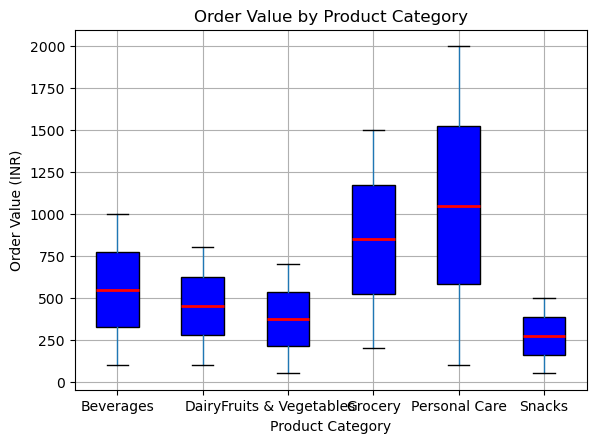

In [6]:
df.boxplot(column='Order_Value_INR', by='Product Category' ,patch_artist=True,
    boxprops=dict(facecolor='blue'),
    medianprops=dict(color ="red",linewidth=2)
)
plt.title('Order Value by Product Category')
plt.suptitle('')
plt.xlabel('Product Category')
plt.ylabel('Order Value (INR)')
plt.show()


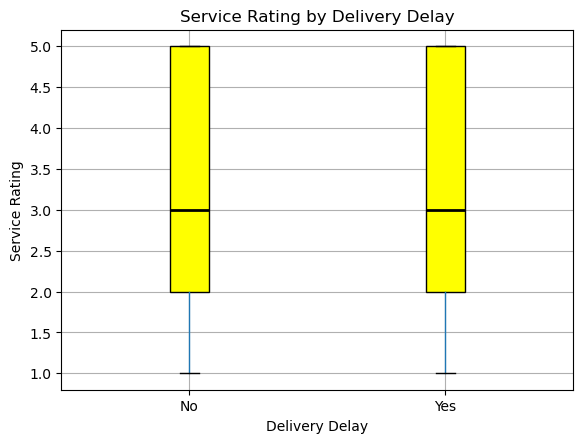

In [17]:
df.boxplot(column='Service Rating', by='Delivery Delay',
    patch_artist=True,
    boxprops=dict(facecolor='yellow'),
    medianprops=dict(color ="black",linewidth=2))

plt.title('Service Rating by Delivery Delay')
plt.suptitle('')
plt.xlabel('Delivery Delay')
plt.ylabel('Service Rating')
plt.show()


# Bivariate Analysis- Numerical and Numerical

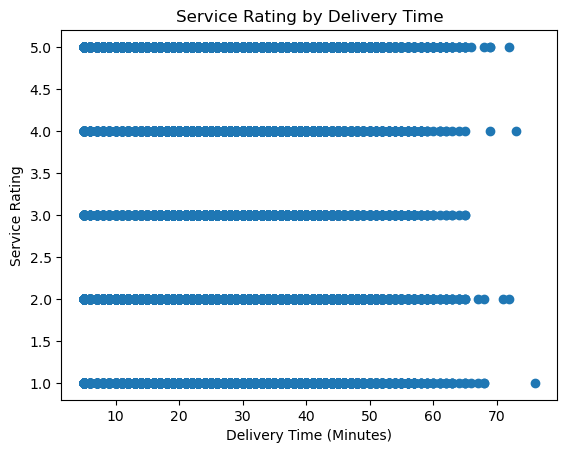

In [19]:
plt.scatter(df['Delivery_Time_Minutes'], df['Service Rating'])
plt.title('Service Rating by Delivery Time')
plt.xlabel('Delivery Time (Minutes)')
plt.ylabel('Service Rating')
plt.show()


# Multivariate Analysis

<Axes: >

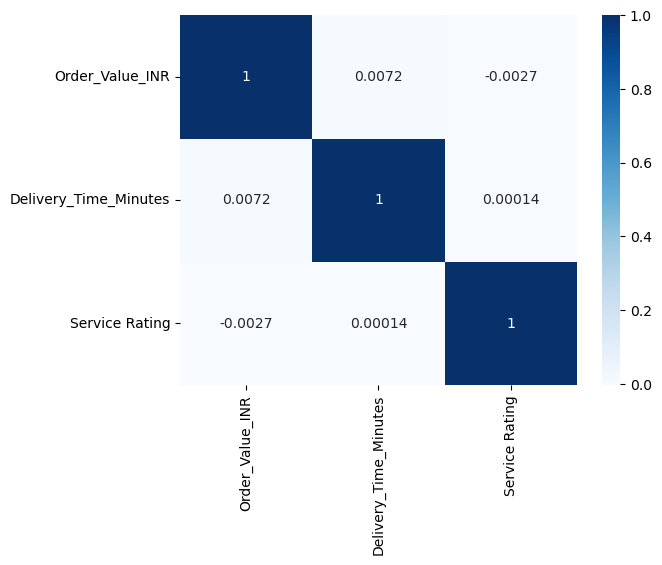

In [30]:
sns.heatmap(df[["Order_Value_INR","Delivery_Time_Minutes","Service Rating"]].corr(),annot=True,cmap="Blues")


<Figure size 500x300 with 0 Axes>

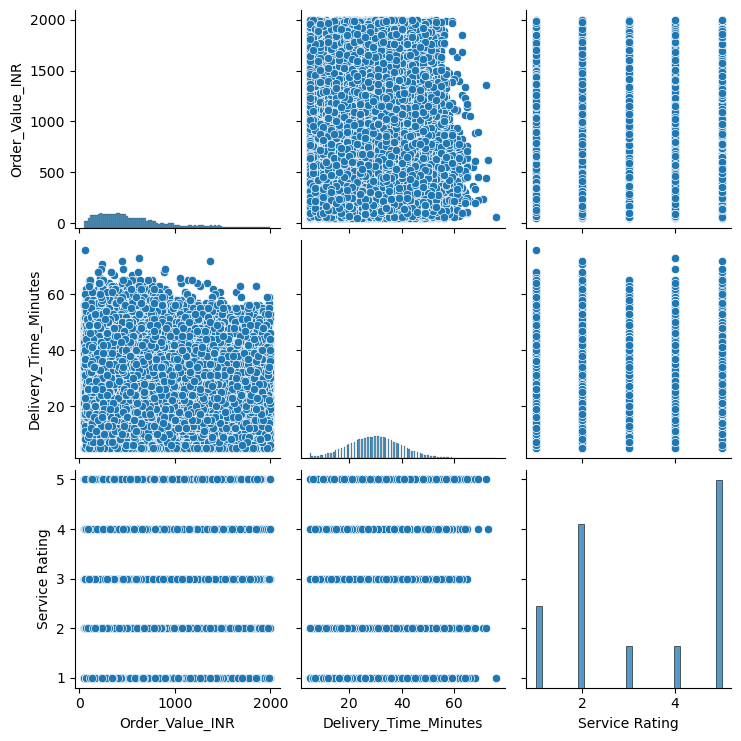

In [28]:
plt.figure(figsize=(5,3))
sns.pairplot(data=df[["Order_Value_INR","Delivery_Time_Minutes","Service Rating"]])
plt.show()